In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,20)
import os,time
from glob import glob

from PIL import Image

from sklearn import neighbors
import re

/var/folders/0h/njbgxkm91h75wxz5tx3bf5dr0000gn/T/ipykernel_21640/1121587740.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('flags_url.csv')

In [3]:
def read_flag(countrycode='IN',file='', res=(128,64)):
    countrycode = countrycode.upper()
    #url = df[df['alpha-2']==countrycode].image_url
    path = f'flags/{countrycode}.png'
    if file!='':
        path = file
    flag = Image.open(path).convert('RGB').resize(res,)
    flag = np.array(flag)
    return flag

In [4]:
re.match('set\d+','set10')

<re.Match object; span=(0, 5), match='set10'>

In [5]:
name2code = lambda x: df[df.country==x]['alpha-2'].to_list()[0]

set1 = ['Venezuela', 'Ecuador', 'Colombia']
set2 = ['Slovenia', 'Russia', 'Slovakia']
set3 = ['Luxembourg','Netherlands']
set4 = ['Norway','Iceland']
set5 = ['New Zealand', 'Australia']
set6 = ['Indonesia', 'Monaco']
set7 = ['Senegal','Mali']
set8= ['India','Niger']
set9= ['Yemen','Syria']
set10 = ['Mexico','Italy']

sets=[]
local_vars = locals()
for var in list(local_vars):
    if re.match('set\d+',var):
        sets += [eval(var)]

#print(sets)
        
codesets = [ list(map(name2code,s)) for s in sets ]
CATEGORIES = list(map(lambda x: x[0], sets))

allcodes = []
for cs in codesets: allcodes+=cs
CATEGORIES

['Venezuela',
 'Slovenia',
 'Luxembourg',
 'Norway',
 'New Zealand',
 'Indonesia',
 'Senegal',
 'India',
 'Yemen',
 'Mexico']

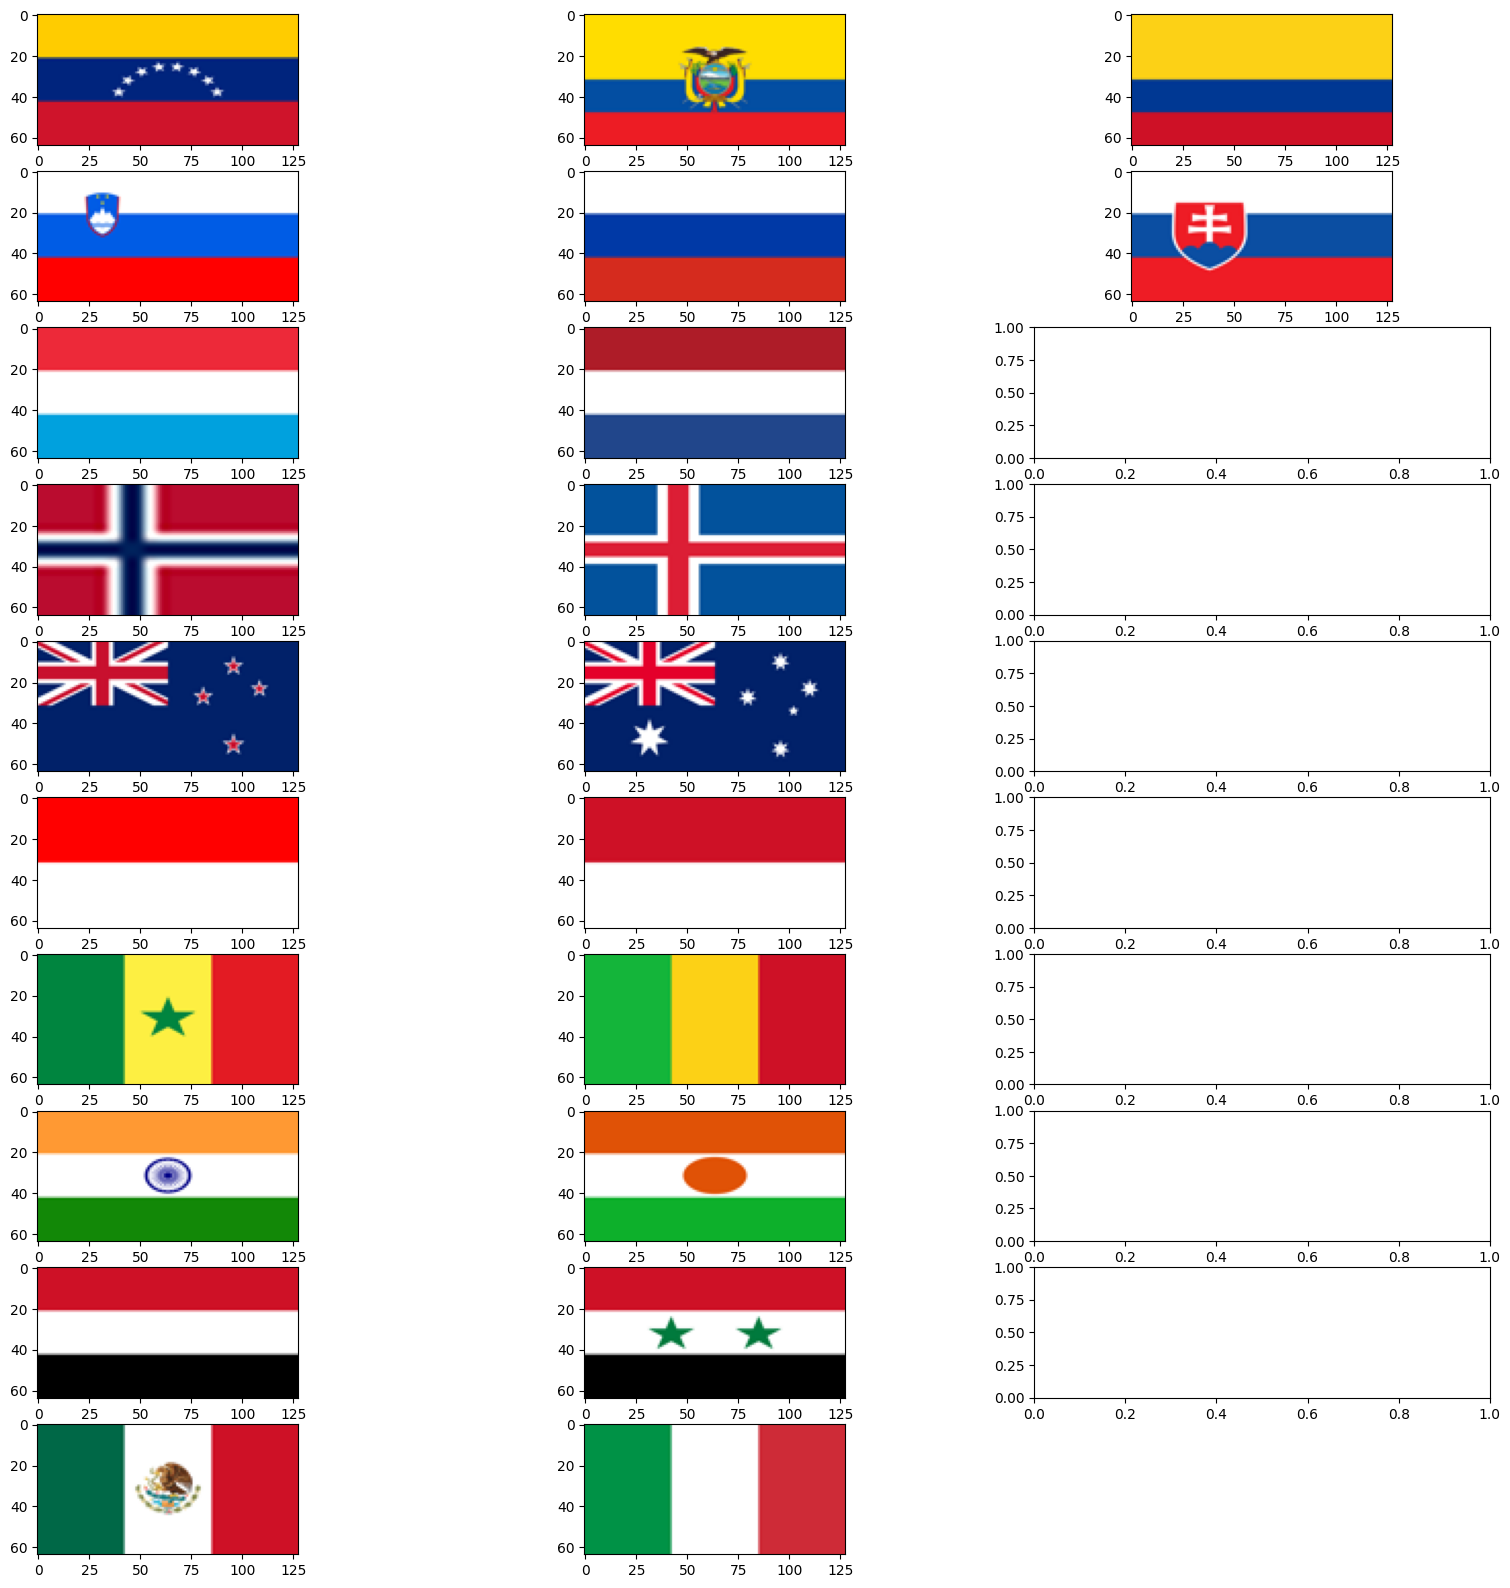

In [6]:
# Similar Flags Plot
fig,axes = plt.subplots(len(codesets),max(map(len,codesets)))
plt.axis('off')

for idx,similars in enumerate(codesets):
    #similars = similars+[[]] if len(similars)==2 else similars
    for idy,s in enumerate(similars):
        if len(s): axes[idx,idy].imshow(read_flag(s))
        #axes[idx,idy].axis('off')

In [7]:
X = np.zeros((len(allcodes),read_flag(allcodes[0]).size))
Y = np.zeros(len(allcodes))
for idx,code in enumerate(allcodes):
    
    # find the category
    category = 0
    for i,cset in enumerate(codesets):
        if code in cset: 
            category = i
            break
        
    x = read_flag(code)
    X[idx,:] = x.flatten()
    Y[idx] = category

In [8]:
clf = neighbors.KNeighborsClassifier(n_neighbors=len(CATEGORIES), weights='distance')
clf.fit(X,Y)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [9]:
clf.predict([read_flag(codesets[3][1]).flatten()])

array([3.])

In [10]:
print(df[df['alpha-2']==codesets[9][-1]].image_url.to_list())

['https://upload.wikimedia.org/wikipedia/en/0/03/Flag_of_Italy.svg']


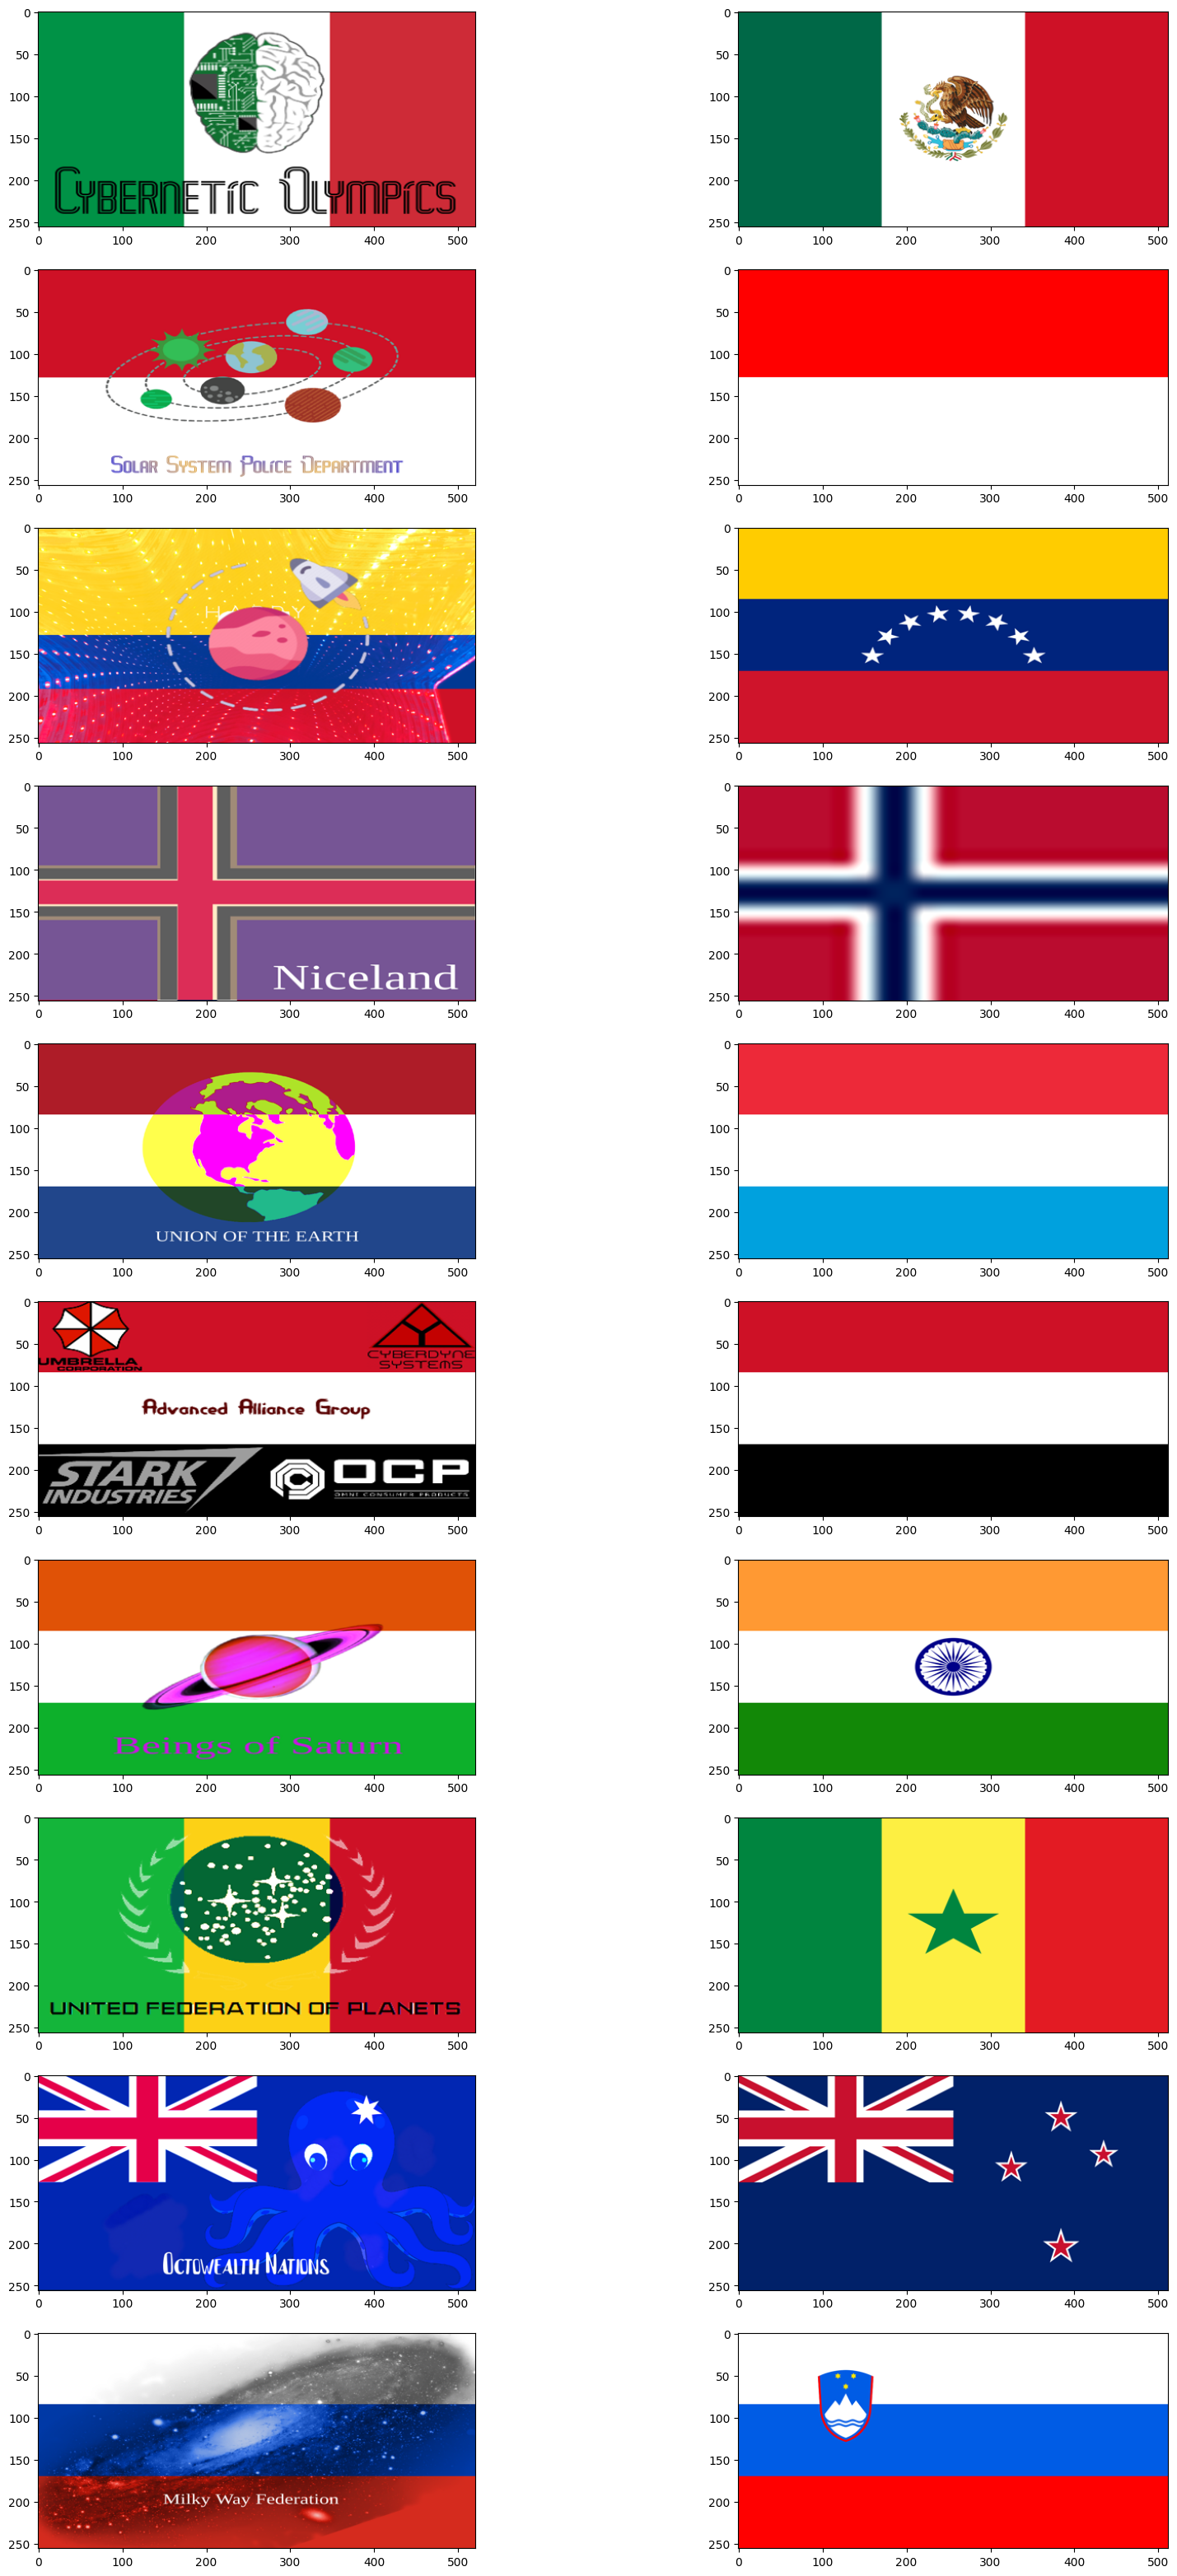

In [11]:
alltests = glob('test_flags/*.png')
fig,axes = plt.subplots(len(alltests),2,figsize=(20,40))
for idx,f in enumerate(glob('test_flags/*.png')):
    #print(f)
    test = read_flag(file=f)
    test_big = read_flag(file=f,res=(521,256))
    
    p = clf.predict([test.flatten()])[0]
    pname = CATEGORIES[int(p)]
    pimg = read_flag(name2code(pname), res=(512,256))
    
    
    axes[idx][0].imshow(test_big)
    axes[idx][1].imshow(pimg)